In [1]:
from google.colab import files
files.upload()



Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\

In [2]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import Image

In [3]:
data = pd.read_csv('winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
X = data.drop(columns = ['quality'])
y = data['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [7]:
X_train.shape

(1199, 11)

In [12]:
X_test.shape

(400, 11)

In [10]:
y_train.shape

(1199,)

In [13]:
y_test.shape

(400,)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
feature_name = list(X.columns)
#feature_name
class_name = list(y_train.unique())
class_name


[5, 6, 7, 4, 3, 8]

In [ ]:
dot_data = export_graphviz(clf, feature_names = feature_name, rounded = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dtree.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
clf.score(X_train,y_train)

1.0

In [ ]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)


0.625

In [ ]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = 0.3, random_state = 355)

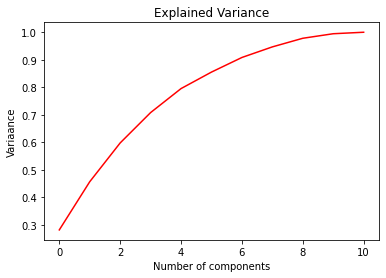

In [ ]:
pca = PCA()
principalcomponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'r')
plt.xlabel('Number of components')
plt.ylabel('Variaance')
plt.title('Explained Variance')
plt.show()


In [ ]:
pca = PCA(n_components= 8)
data1 = pca.fit_transform(x_transform)
principal_components = pd.DataFrame(data1, columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])
principal_components

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(principal_components, y, test_size= 0.3, random_state= 355)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.59375

In [ ]:
grid_param = {'criterion':['gini','entropy'],'max_depth' : (2,32,1), 'min_samples_leaf': range(1, 10 ,1),'min_samples_split': range(2,10,1),'splitter': ['best','random']}

In [ ]:
grid_search = GridSearchCV(estimator= clf, param_grid = grid_param, cv = 5 ,n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (2, 32, 1),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

AttributeError: ignored

In [ ]:
grid_search.best_score_

0.5978299167200513

In [ ]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30, min_samples_leaf= 1, min_samples_split= 3, splitter= 'best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=3)

In [ ]:
clf.score(X_test,y_test)

0.5145833333333333

In [ ]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
dot_data = export_graphviz(clf, rounded =True, filled =True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.